In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
import tensorflow as tf

import tensorflow_datasets as tfds

tf.executing_eagerly()

True

In [ ]:
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from numpy import *
from PIL import Image
import theano

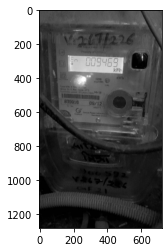

In [ ]:
DATADIR='/content/drive/MyDrive/Image_classification/datasets'
CATEGORIES=["meter","non-meter"]
for category in CATEGORIES:
  path=os.path.join(DATADIR,category) #path to meter or non-meter dir
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break  

In [ ]:
print(img_array.shape)

(1280, 720)


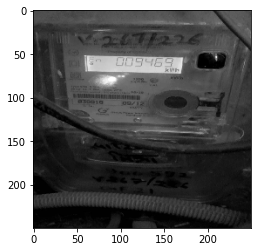

In [ ]:
IMG_SIZE=250
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [ ]:
training_data=[]
DATADIR='/content/drive/MyDrive/Image_classification/datasets'
CATEGORIES=["meter","non_meter"]
def create_training_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category) #path to meter or non-meter dir
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass

create_training_data()     

In [ ]:
print(len(training_data))
import random
random.shuffle(training_data)

1644


In [ ]:
for sample in training_data[:10]:
  print(sample[1])

0
1
1
1
0
1
1
1
1
1


In [ ]:
#training_data[:5]
X=[]
y=[]
for features,label in training_data:
  X.append(features)
  y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)  


In [ ]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import pickle
with open('X.pickle', 'rb') as f:
    X = pickle.load(f)

with open('y.pickle', 'rb') as f:
     Y= pickle.load(f)    

In [ ]:
#X[1]
X = X.astype('float32')
X /= 255
from keras.utils import np_utils
#Y = np_utils.to_categorical(Y,1)
print(Y[100])
print(shape(Y))

1
(1644,)


In [ ]:
Y=np.array(Y)

In [ ]:
Y

[0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,


In [ ]:
#print(shape(X))
#X[1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

#OUR CNN MODEL

In [ ]:
batch_size =32
nb_classes =2
nb_epochs = 20
img_rows, img_columns = 200, 200
img_channel = 1
nb_filters = 32
nb_pool = 5
nb_conv = 5

In [ ]:
#tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    #tf.keras.layers.MaxPooling2D((2, 2), strides=2),

In [ ]:
#2 conv layers,2 pooling layers,2 FC layers, dropout rate=0.1 low)
def create_model():
  model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16,(3,3), padding='same', activation='relu',
                              input_shape=(250, 250, 1)),
        tf.keras.layers.MaxPooling2D((2,2), strides=2),
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2), strides=2),
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2), strides=2),
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2), strides=2),
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2), strides=2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, y_test)) 
  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()
#tf.nn.softmax

Epoch 1/20
42/42 [==============================] - 3s 55ms/step - loss: 0.6463 - accuracy: 0.6350 - val_loss: 0.4396 - val_accuracy: 0.8267
Epoch 2/20
42/42 [==============================] - 2s 50ms/step - loss: 0.4405 - accuracy: 0.8228 - val_loss: 0.3421 - val_accuracy: 0.8571
Epoch 3/20
42/42 [==============================] - 2s 50ms/step - loss: 0.2976 - accuracy: 0.8821 - val_loss: 0.2288 - val_accuracy: 0.9210
Epoch 4/20
42/42 [==============================] - 2s 50ms/step - loss: 0.2355 - accuracy: 0.9087 - val_loss: 0.1839 - val_accuracy: 0.9301
Epoch 5/20
42/42 [==============================] - 2s 50ms/step - loss: 0.1747 - accuracy: 0.9293 - val_loss: 0.2015 - val_accuracy: 0.9149
Epoch 6/20
42/42 [==============================] - 2s 50ms/step - loss: 0.1386 - accuracy: 0.9483 - val_loss: 0.1921 - val_accuracy: 0.9149
Epoch 7/20
42/42 [==============================] - 2s 50ms/step - loss: 0.1714 - accuracy: 0.9270 - val_loss: 0.2062 - val_accuracy: 0.9149
Epoch 8/20
42

In [ ]:
cd /content/drive/MyDrive/Image_classification/datasets/new

/content/drive/MyDrive/Image_classification/datasets/new


In [ ]:
model.save('my_model.h5') 
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 250, 250, 16)      160       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 31, 31, 64)      

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import cv2 as cv 
import skimage.io
import skimage.transform
# load and prepare the image
def load_image(filename):
  size=250
  img = cv.imread(filename)
  newimage = cv.cvtColor(img,cv.cv2.COLOR_BGR2GRAY)
  img = img_to_array(img)
  new_image_data = skimage.transform.resize(newimage,(250,250,1))
  new_image_data = new_image_data.reshape((1,250,250, 1)).astype(np.float32) / 255.0
  return new_image_data
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('fxeJAPbxLek_owO2RNagXhNzZTJm4Si2V4yrnEF3_bigImg_1589696090.jpg')
	# load model
	new_model = tf.keras.models.load_model('my_model.h5')
	# predict the class
	result = new_model.predict_classes(img)
	print(result[0])
 
# entry point, run the example
run_example()
#DONE

[1]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# load the image
	#img = load_img(filename, target_size=(250, 250),grayscale=True)
	# convert to array
	#img = img_to_array(img)
	# reshape into a single sample with 3 channels
	#img = img.reshape(1,250,250,1)
	#center pixel data
	#img = img.astype('float32')
	#img = img - [123.68, 116.779, 103.939]

In [ ]:
score = new_model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.2879076898097992
Test accuracy:  0.93313068151474


In [ ]:
# predict probabilities for test set
yhat_probs = new_model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = new_model.predict_classes(X_test, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
yhat_classes
#y_test

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [ ]:
# accuracy: (tp + tn) / (p + n)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.933131
Precision: 0.906736
Recall: 0.977654
F1 score: 0.940860


PLOTTING & CURVES

In [ ]:
import pandas as pd
def calc_precision_recall(y_true, y_pred):
    #y_true=list(y_true)
    t=list(y_true)
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=range(0,len(t)))
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in range(0,len(t)):
      if y_true[i]==y_pred[i]==1:
        TP += 1
      if y_pred[i]==1 and y_true[i]!=y_pred[i]:
        FP += 1
      if y_pred[i]==0 and y_test[i]!=y_pred[i]:
        FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

# Test function

#calc_precision_recall(y_test, y_pred_test)

In [ ]:
y_test_probs = model.predict_proba(X_test)[:,1]
y_test_probs
# Containers for true positive / false positive rates
precision_scores = []
recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0, 1, num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
    z=y_test        
    precision, recall = calc_precision_recall(z, y_test_preds)
        
    precision_scores.append(precision)
    recall_scores.append(recall)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


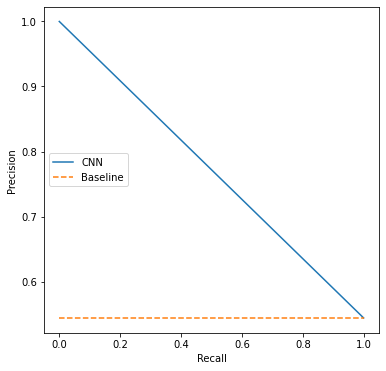

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall_scores, precision_scores, label='CNN')
#ax.plot(l2_recall_scores, l2_precision_scores, label='L2 Logistic Regression')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


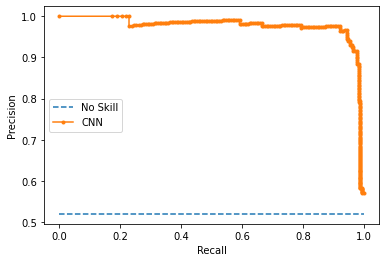

In [ ]:
# predict probabilities (Precision-Recall curve)
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
yhat = new_model.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat
# calculate the no skill line as the proportion of the positive class
no_skill = len(Y[Y==1]) / len(Y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='CNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import auc
auc_score = auc(recall, precision)
print('CNN PR AUC: %.3f' % auc_score)

CNN PR AUC: 0.978


RESULTS ON NEW IMAGES